# **Proportion of travelers of one province who are currently in another province**

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data set

In [2]:
mobility_data = pd.read_csv("HM_&_SIRD.csv")
population_data = pd.read_csv("P_2020.csv")


### Algorithm

In [3]:
origin = mobility_data["mi"]*1000  #### population of origin
destination = mobility_data["mj"]*1000  #### population of destination
surrounding_population = mobility_data["sij"]*1000  #### surrounding population


proportion_of_travelers = np.zeros((9,9)) #### This matrix expresses the proportion of travelers from province i who are currently in Province j
                                               #### In the context of the radiation model, the row sum of this matrix is not equal to 1

M = np.sum(population_data["Population"])*1000 ### Total population
Mc = 11544447

row = 0
for z in range(0,81,9):
    for j in range(0,9):
            proportion_of_travelers[row][j] =(origin[j+z]*destination[j+z])/((1-origin[j+z]/M)*(origin[j+z]+surrounding_population[j+z])*(origin[j+z]+destination[j+z]+surrounding_population[j+z]))
    row = row + 1    

### $W_{ij}$ matrix

In [4]:
proportion_of_travelers = proportion_of_travelers*(Mc/M)
print(proportion_of_travelers)

[[0.30161059 0.00989738 0.00950089 0.07831569 0.00424557 0.25740422
  0.01191302 0.07689133 0.07851866]
 [0.08515337 0.28332538 0.09813744 0.03613725 0.00258479 0.01789434
  0.00724996 0.25051891 0.02910017]
 [0.08213824 0.02409102 0.27937772 0.36342221 0.01112064 0.01132636
  0.0049955  0.01030851 0.01931718]
 [0.30916679 0.00910378 0.01439062 0.29698097 0.0039077  0.01653863
  0.01096192 0.00874304 0.15396762]
 [0.02739209 0.03239747 0.30139199 0.12763669 0.27572001 0.0047775
  0.00412045 0.0026269  0.02637217]
 [0.33234407 0.00536991 0.00501888 0.01170925 0.00307504 0.28964555
  0.01732845 0.01231437 0.13957994]
 [0.02424943 0.00826256 0.00557132 0.01558882 0.00409532 0.26058983
  0.29852518 0.01670319 0.19173762]
 [0.37366027 0.02761639 0.00272328 0.00621691 0.00200167 0.06256681
  0.02475421 0.27930644 0.02718182]
 [0.08590876 0.02007858 0.01876235 0.13028065 0.0114997  0.18373395
  0.05486811 0.02197167 0.36611702]]


### Normalized $W_{ij}$ matrix

In [5]:
normalized_proportion_of_travelers = np.zeros((9,9))

for i in range(0,9):
    a = np.sum(proportion_of_travelers[i])
    for j in range(0,9):
        normalized_proportion_of_travelers[i][j] = proportion_of_travelers[i][j]/a

print(normalized_proportion_of_travelers)

[[0.36413323 0.01194907 0.01147038 0.09455021 0.00512565 0.31076306
  0.01438254 0.09283059 0.09479526]
 [0.10511443 0.34974055 0.12114214 0.04460829 0.00319069 0.022089
  0.00894944 0.30924382 0.03592163]
 [0.10189617 0.029886   0.34658061 0.45084156 0.01379566 0.01405085
  0.00619715 0.01278818 0.02396382]
 [0.37531125 0.01105148 0.01746941 0.36051834 0.00474373 0.02007698
  0.01330716 0.01061356 0.1869081 ]
 [0.0341362  0.04037394 0.37559664 0.15906166 0.34360405 0.00595375
  0.00513493 0.00327367 0.03286516]
 [0.4070921  0.00657767 0.00614768 0.01434279 0.00376666 0.35479018
  0.02122582 0.01508402 0.17097309]
 [0.02938173 0.0100113  0.00675046 0.01888814 0.00496208 0.31574274
  0.36170697 0.02023836 0.2323182 ]
 [0.46358236 0.03426233 0.00337865 0.00771303 0.00248337 0.07762363
  0.03071135 0.34652209 0.03372318]
 [0.09617864 0.02247886 0.02100528 0.14585493 0.01287442 0.20569824
  0.06142727 0.02459825 0.40988412]]


### Heatmap of normalized $W_{ij}$

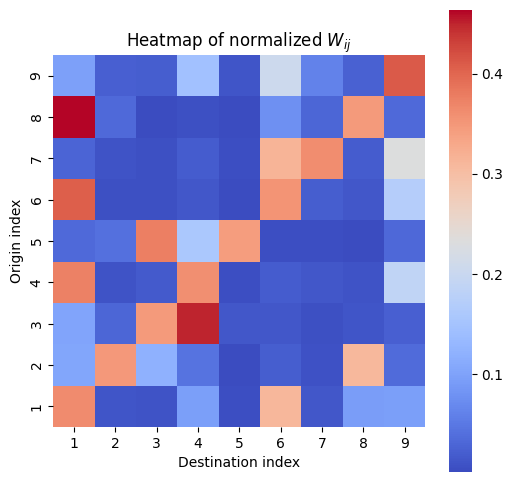

In [6]:
normalized_proportion_of_travelers_heat_map = np.zeros((9,9))

for i in range(0,9):
    normalized_proportion_of_travelers_heat_map[8-i] = normalized_proportion_of_travelers[i]  

index_origin = [9,8,7,6,5,4,3,2,1]
index_destination = [1,2,3,4,5,6,7,8,9]

plt.figure(figsize = (6,6))
sns.heatmap(normalized_proportion_of_travelers_heat_map,cmap='coolwarm',square=True,xticklabels=index_destination,yticklabels=index_origin)
plt.xlabel("Destination index")
plt.ylabel("Origin index")
plt.title("Heatmap of normalized " + r'$W_{ij}$' )
plt.show()